## Importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CHECKPOINT 1 : Data Cleaning 1

## Creating required dataframes

In [2]:
companies = pd.read_csv("companies.txt", sep="\t", encoding = "iso-8859-1")
rounds2 = pd.read_csv("rounds2.csv", encoding = "iso-8859-1")

In [3]:
#checking if any company is there in rounds2 dataframe which is not present in the companies dataframe.
set(rounds2['company_permalink'].str.upper()) - set(companies['permalink'].str.upper())

{'/ORGANIZATION/E-CÃ\x8aBICA',
 '/ORGANIZATION/ENERGYSTONE-GAMES-Ç\x81ΜÇ\x9f³Æ¸¸Æ\x88\x8f',
 '/ORGANIZATION/HUIZUCHE-COM-Æ\x83\xa0Ç§ŸÈ½¦',
 '/ORGANIZATION/MAGNET-TECH-Ç£\x81Ç\x9f³Ç§\x91Æ\x8a\x80',
 '/ORGANIZATION/TIPCAT-INTERACTIVE-Æ²\x99È\x88ŸÄ¿¡Æ\x81¯Ç§\x91Æ\x9a\x80',
 '/ORGANIZATION/WEICHE-TECH-Å\x96\x82È½¦Ç§\x91Æ\x8a\x80',
 '/ORGANIZATION/ZENGAME-Ç¦\x85Æ¸¸Ç§\x91Æ\x8a\x80'}

## Removing Special Characters

In [4]:
#Let's check, is the special characters is the reason for not getting the expected NULL intersection.
#we are trying to convert those special characters to the simple English characters.
#converting the special characters to understandable english characters.
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')
set(rounds2['company_permalink'].str.upper()) - set(companies['permalink'].str.upper())

set()

## Question 1: How many unique companies are present in rounds2? 

In [5]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2['company_permalink'].describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

## Answer: 66368

## Question 2: How many unique companies are present in companies file? 

In [6]:
companies['permalink'] = companies['permalink'].str.lower()
companies['permalink'].describe()

count                         66368
unique                        66368
top       /organization/thundermaps
freq                              1
Name: permalink, dtype: object

## Answer:66368

## Question 3: In the companies data frame, which column can be used as the  unique key for each company?

In [7]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


## Answer: 'permalink'

## Question 4: Are there any companies in the rounds2 file which are not  present in companies? 

In [9]:
set(rounds2['company_permalink']) - set(companies['permalink'])

set()

## Answer: No(N)

In [10]:
#Creating the master_frame dataframe by mering companies and rounds2 dataframes.
master_frame = pd.merge(rounds2, companies, left_on = 'company_permalink', right_on = 'permalink', how ='inner')
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


## Question 5: Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [11]:
master_frame['company_permalink'].describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

## Answer: 114949

# CHECKPOINT 2: Funding Type Analysis

In [12]:
#average raised amount for the Venture
venture = rounds2['funding_round_type'] == "venture"
venture = rounds2[venture]
#average raised amount for the Angel
angel = rounds2['funding_round_type'] == "angel"
angel = rounds2[angel]
#average raised amount for the Seed
seed = rounds2['funding_round_type'] == "seed"
seed = rounds2[seed]
#average raised amount for the Private Equity
private_equity = rounds2['funding_round_type'] == "private_equity"
private_equity = rounds2[private_equity]
print('venture = ', venture['raised_amount_usd'].mean(), ', angel = ', angel['raised_amount_usd'].mean())

venture =  11748949.129489528 , angel =  958694.4697530865


## Question 1: Average funding amount of venture type

In [13]:
venture['raised_amount_usd'].mean()

11748949.129489528

## Answer: 11748949.129489528

## Question 2: Average funding amount of angel type

In [14]:
angel['raised_amount_usd'].mean()

958694.4697530865

## Answer: 958694.4697530865

## Question 3: Average funding amount of seed type

In [15]:
seed['raised_amount_usd'].mean()

719817.9969071728

## Answer: 719817.9969071728

## Question 4: Average funding amount of private equity type

In [16]:
private_equity['raised_amount_usd'].mean()

73308593.02944215

## Answer: 73308593.02944215

## Question 5: Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [17]:
#Let's filter out the average investments between 5 to 15 million USD
print('venture = ', venture['raised_amount_usd'].mean() >= 5000000 and venture['raised_amount_usd'].mean() <= 15000000,
      '\nangel = ', angel['raised_amount_usd'].mean() >= 5000000 and angel['raised_amount_usd'].mean() <= 15000000,
      '\nseed = ', seed['raised_amount_usd'].mean() >= 5000000 and seed['raised_amount_usd'].mean() <= 15000000,
      '\nprivate_equity = ', private_equity['raised_amount_usd'].mean() >= 5000000 and private_equity['raised_amount_usd'].mean() <= 15000000)

venture =  True 
angel =  False 
seed =  False 
private_equity =  False


## Answer: Venture

# Checkpoint 3: Country Analysis

In [18]:
#let's select only countries which are having venture as investment type.
master_frame = master_frame.loc[master_frame['funding_round_type'] == 'venture']
#list of english speaking coutries with 3 letter representation code is below.
#note this list is extracted from 'http://www.emmir.org/fileadmin/user_upload/admission/Countries_where_English_is_an_official_language.pdf'.
#3 letter country codes are extracted from 'https://www.nationsonline.org/oneworld/country_code_list.htm'.
english_countries = ["BWA", "CMR", "ETH", "ERI", "GMB", "GHA", "KEN", "LSO", "LBR", "MWI", "MUS", "NAM", "NGA", "RWA", "SYC", "SLE", "ZAF", "SSD", "SDN", "SWZ", "TZA", "UGA", "ZMB", "ZWE", "ATG", "BHS", "BRB", "BLZ", "CAN", "DMA", "GRD", "GUY", "JAM", "KNA", "LCA", "VCT", "TTO", "USA", "IND", "PAK", "PHL", "SGP", "AUS", "FJI", "KIR", "MHL", "FSM", "NRU", "NZL", "PLW", "PNG", "WSM", "SLB", "TON", "TUV", "VUT", "IRL", "MLT", "GBR"]
#keeping only english speaking countries in master_frame
master_frame= master_frame.loc[master_frame['country_code'].isin(english_countries)]
#getting the total raised_amount_usd of the each english speaking country.
english_countries = master_frame.groupby(['country_code'])['raised_amount_usd'].aggregate('sum')
#selecting only top 9 countries
top9 = pd.DataFrame(english_countries.sort_values(ascending = False).head(9))
#making index as a new column in top9 dataframe
top9['country_code'] = top9.index
#reseting index as traditional.
top9 = top9.reset_index(drop=True)
#Interchanging rows for better representation of dataframe top9
top9 =  top9[['country_code', 'raised_amount_usd']]
#top9 dataframe
top9

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,GBR,2.024563e+10
2,IND,1.439186e+10
3,CAN,9.583332e+09
4,SGP,2.793918e+09
5,IRL,1.676131e+09
6,AUS,1.322935e+09
7,NZL,4.483164e+08
8,NGA,2.454400e+08


## Question 1: Top English speaking country

In [19]:
 top9.iloc[[0]]

,country_code,raised_amount_usd
0,USA,4.225108e+11


## Answer : USA

## Question 2: Second English speaking country

In [20]:
top9.iloc[[1]]

,country_code,raised_amount_usd
1,GBR,2.024563e+10


## Answer: GBR

## Question 3: Third English speaking country

In [21]:
top9.iloc[[2]]

,country_code,raised_amount_usd
2,IND,1.439186e+10


## Answer: IND

# Checkpoint 4: Sector Analysis 1

In [22]:
#Splitting the column 'category_list' and making it as a new column.
x = master_frame["category_list"].str.split("|", n = 1, expand = True)
master_frame['primary_sector'] = x[0]
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,Education
33,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,Beauty


## Question 1:Code for a merged data frame with each primary sector mapped to its main sector 

In [23]:
#creating a dataframe called mapping by reading mapping.csv
mapping = pd.read_csv("mapping.csv", encoding = "iso-8859-1")
#converting dummy variables into categorical variables.
n = range(1,10)
for i in  n:
    mapping.iloc[:,i] =  mapping.iloc[:,i].replace(1, list(mapping)[i])
for i in n:
    mapping.iloc[:,i] =  mapping.iloc[:,i].replace(0, "")
mapping['main_sector'] = mapping.iloc[:,1].map(str) + mapping.iloc[:,2].map(str) + mapping.iloc[:,3].map(str) + mapping.iloc[:,4].map(str) + mapping.iloc[:,5].map(str) + mapping.iloc[:,6].map(str) + mapping.iloc[:,7].map(str) + mapping.iloc[:,8].map(str) + mapping.iloc[:,9].map(str)

#Keeping only required columns by dropping range of unnecessary columns mapping dataframe.
mapping.drop(mapping.iloc[:, 1:-1], inplace=True, axis=1)
mapping.head()

,category_list,main_sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [24]:
master_frame = master_frame.reset_index().merge(mapping, left_on='primary_sector', right_on= 'category_list', how="left").set_index('index')

In [25]:
master_frame.drop(master_frame.iloc[:, -2:-1], inplace=True, axis=1)

## Answer: below is the required merged dataframe which is having the required columns as last two.

In [26]:
master_frame['main_sector'].isna().describe()

count     43965
unique        2
top       False
freq      40979
Name: main_sector, dtype: object

# Checkpoint 5: Sector Analysis 2

In [27]:
#taking only amount between 5 to 15 million.
amount = range(5000000, 15000001)
master_frame = master_frame.loc[master_frame['raised_amount_usd'].isin(amount)]
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
index,,,,,,,,,,,,,,,,,,
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,NaN
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps,"News, Search and Messaging"
103,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,Service Providers,Others
110,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing
111,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing
112,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing
113,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing
114,/organization/1366-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,6000000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing


In [28]:
#Creating three dataframes D1, D2, D3 for top investing countries USA, GBR and IND respectively.
D1 = master_frame.loc[master_frame['country_code'] == 'USA']
D2 = master_frame.loc[master_frame['country_code'] == 'GBR']
D3 = master_frame.loc[master_frame['country_code'] == 'IND']
D1.groupby(['main_sector'])['main_sector'].aggregate('count')

main_sector
Automotive & Sports                         167
Blanks                                       86
Cleantech / Semiconductors                 2297
Entertainment                               580
Health                                      908
Manufacturing                               799
News, Search and Messaging                 1563
Others                                     2923
Social, Finance, Analytics, Advertising    1912
Name: main_sector, dtype: int64

In [29]:
#Summerise D1 by main_sector in terms of sum of raised_amount and count for the same.
D1_summary = D1.groupby(['main_sector'])['raised_amount_usd'].aggregate(('sum', 'count')).sort_values(by=['sum'], ascending = False)
D1_summary

,sum,count
main_sector,,
Others,2.608928e+10,2923
Cleantech / Semiconductors,2.118100e+10,2297
"Social, Finance, Analytics, Advertising",1.668070e+10,1912
"News, Search and Messaging",1.379682e+10,1563
Health,8.200859e+09,908
Manufacturing,7.258553e+09,799
Entertainment,5.000213e+09,580
Automotive & Sports,1.454104e+09,167
Blanks,7.647633e+08,86


In [30]:
#Summerise D2 by main_sector in terms of sum of raised_amount and count for the same.
D2_summary = D2.groupby(['main_sector'])['raised_amount_usd'].aggregate(('sum', 'count')).sort_values(by=['sum'], ascending = False)
D2_summary

,sum,count
main_sector,,
Others,1.249124e+09,143
Cleantech / Semiconductors,1.136905e+09,127
"Social, Finance, Analytics, Advertising",8.218884e+08,98
"News, Search and Messaging",6.157462e+08,73
Entertainment,4.615111e+08,54
Manufacturing,3.619403e+08,42
Health,2.145375e+08,24
Automotive & Sports,1.670516e+08,16
Blanks,5.776485e+07,7


In [31]:
#Summerise D3 by main_sector in terms of sum of raised_amount and count for the same.
D3_summary = D3.groupby(['main_sector'])['raised_amount_usd'].aggregate(('sum', 'count')).sort_values(by=['sum'], ascending = False)
D3_summary

,sum,count
main_sector,,
Others,1.007410e+09,109
"News, Search and Messaging",4.338345e+08,52
"Social, Finance, Analytics, Advertising",2.905435e+08,32
Entertainment,2.808300e+08,33
Manufacturing,2.009000e+08,21
Health,1.677400e+08,19
Cleantech / Semiconductors,1.653800e+08,20
Automotive & Sports,1.369000e+08,13
Blanks,2.700000e+07,2


## Question 1: Total number of Investments (count)

In [32]:
D1['raised_amount_usd'].notna().sum()

12150

## Answer(c1): 12150

In [33]:
D2['raised_amount_usd'].notna().sum()

628

## Answer(c2): 628

In [34]:
D3['raised_amount_usd'].notna().sum()

330

## Answer(c3): 330

## Question 2: Total amount of investment (USD)

In [35]:
D1['raised_amount_usd'].sum()

108531347515.0

## Answer(c1): 108531347515.0

In [36]:
D2['raised_amount_usd'].sum()

5436843539.0

## Answer(c2): 5436843539.0

In [37]:
D3['raised_amount_usd'].sum()

2976543602.0

## Answer(c3): 2976543602.0

In [38]:
D1_top = D1_summary.index[0]
D1_second =  D1_summary.index[1]
D2_top = D2_summary.index[0]
D2_second =  D2_summary.index[1]
D3_top = D3_summary.index[0]
D3_second =  D3_summary.index[1]

## Question 3: Top Sector name (no. of investment-wise)
## Question 4: Second Sector name (no. of investment-wise)
## Question 5: Third Sector name (no. of investment-wise)
## Question 6: Number of investments in top sector (3)
## Question 7: Number of investments in second sector (4)
## Question 8: Number of investments in third sector (5)

In [39]:
D1_summary

,sum,count
main_sector,,
Others,2.608928e+10,2923
Cleantech / Semiconductors,2.118100e+10,2297
"Social, Finance, Analytics, Advertising",1.668070e+10,1912
"News, Search and Messaging",1.379682e+10,1563
Health,8.200859e+09,908
Manufacturing,7.258553e+09,799
Entertainment,5.000213e+09,580
Automotive & Sports,1.454104e+09,167
Blanks,7.647633e+08,86


## Answer3(c1): Others
## Answer4(c1): Cleantech / Semiconductors
## Answer5(c1): Social, Finance, Analytics, Advertising
## Answer6(c1): 2923
## Answer7(c1): 2297
## Answer8(c1): 1912

In [40]:
D2_summary

,sum,count
main_sector,,
Others,1.249124e+09,143
Cleantech / Semiconductors,1.136905e+09,127
"Social, Finance, Analytics, Advertising",8.218884e+08,98
"News, Search and Messaging",6.157462e+08,73
Entertainment,4.615111e+08,54
Manufacturing,3.619403e+08,42
Health,2.145375e+08,24
Automotive & Sports,1.670516e+08,16
Blanks,5.776485e+07,7


## Answer3(c2): Others
## Answer4(c2): Cleantech / Semiconductors
## Answer5(c2): Social, Finance, Analytics, Advertising
## Answer6(c1): 143
## Answer7(c1): 127
## Answer8(c1): 98

In [41]:
D3_summary

,sum,count
main_sector,,
Others,1.007410e+09,109
"News, Search and Messaging",4.338345e+08,52
"Social, Finance, Analytics, Advertising",2.905435e+08,32
Entertainment,2.808300e+08,33
Manufacturing,2.009000e+08,21
Health,1.677400e+08,19
Cleantech / Semiconductors,1.653800e+08,20
Automotive & Sports,1.369000e+08,13
Blanks,2.700000e+07,2


## Answer3(c2): Others
## Answer4(c2): News, Search and Messaging
## Answer5(c2): Entertainment
## Answer6(c1): 109
## Answer7(c1): 52
## Answer8(c1): 33

## Question 9: Top Sector name (no. of investment-wise)

In [42]:
D1_top = D1.loc[D1['main_sector'] == D1_top]

In [43]:
D1_top.groupby(['name'])['raised_amount_usd'].aggregate('sum').sort_values(ascending=False, inplace=False).head(1)

name
Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64

## Answer(c1): Virtustream

In [44]:
D2_top = D2.loc[D2['main_sector'] == D2_top]

In [45]:
D2_top.groupby(['name'])['raised_amount_usd'].aggregate('sum').sort_values(ascending=False, inplace=False).head(1)

name
Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64

## Answer(c2): Electric Cloud

In [46]:
D3_top = D3.loc[D3['main_sector'] == D3_top]

In [47]:
D3_top.groupby(['name'])['raised_amount_usd'].aggregate('sum').sort_values(ascending=False, inplace=False).head(1)

name
FirstCry.com    39000000.0
Name: raised_amount_usd, dtype: float64

## Answer(c3): FirstCry.com

## Question 10: Second Sector name (no. of investment-wise)

In [48]:
D1_second = D1.loc[D1['main_sector'] == D1_second]

In [49]:
D1_second.groupby(['name'])['raised_amount_usd'].aggregate('sum').sort_values(ascending=False, inplace=False).head(1)

name
Biodesix    75300000.0
Name: raised_amount_usd, dtype: float64

## Answer(c1): Biodesix

In [50]:
D2_second = D2.loc[D2['main_sector'] == D2_second]

In [51]:
D2_second.groupby(['name'])['raised_amount_usd'].aggregate('sum').sort_values(ascending=False, inplace=False).head(1)

name
EUSA Pharma    35600000.0
Name: raised_amount_usd, dtype: float64

## Answer(c2): EUSA Pharma

In [52]:
D3_second = D3.loc[D3['main_sector'] == D3_second]

In [53]:
D3_second.groupby(['name'])['raised_amount_usd'].aggregate('sum').sort_values(ascending=False, inplace=False).head(1)

name
GupShup    33000000.0
Name: raised_amount_usd, dtype: float64

## Answer(c3): GupShup

# Checkpoint 6: Plots

In [54]:
#Aggreating necessary funding type and averaged raised amount in one dataframe called fund_avg. 
funding_type = pd.Series(['venture', 'angel', 'seed', 'private_equity'])
avg_raised_amount = pd.Series([venture['raised_amount_usd'].mean(), angel['raised_amount_usd'].mean(), seed['raised_amount_usd'].mean(), private_equity['raised_amount_usd'].mean()])
fund_avg = pd.concat([funding_type, avg_raised_amount], axis=1).reset_index(drop=True)
fund_avg = fund_avg.rename(columns={0: 'funding_type', 1: 'avg_raised_amount'})
fund_avg

,funding_type,avg_raised_amount
0,venture,1.174895e+07
1,angel,9.586945e+05
2,seed,7.198180e+05
3,private_equity,7.330859e+07


## Question 1: A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

## Answer: Plot1

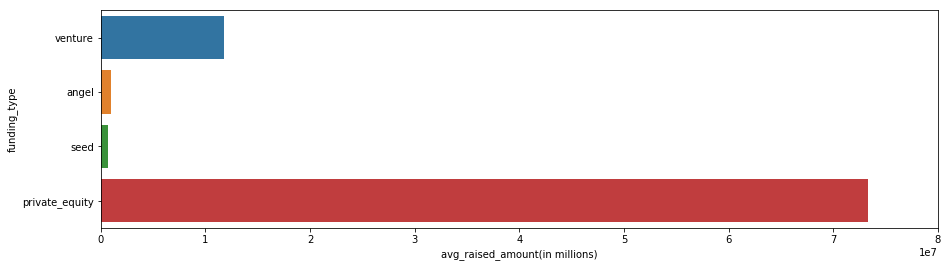

In [55]:
plt.figure(figsize=(15,4))
plot1 = sns.barplot(x = avg_raised_amount, y = funding_type,)
plot1.set(xlabel = 'avg_raised_amount(in millions)', ylabel = 'funding_type')
plot1.set_xlim(0, 80000000)
fig1 = plot1.get_figure()
fig1.savefig("plot1.png")

## Question 2: A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

## Answer: Plot2

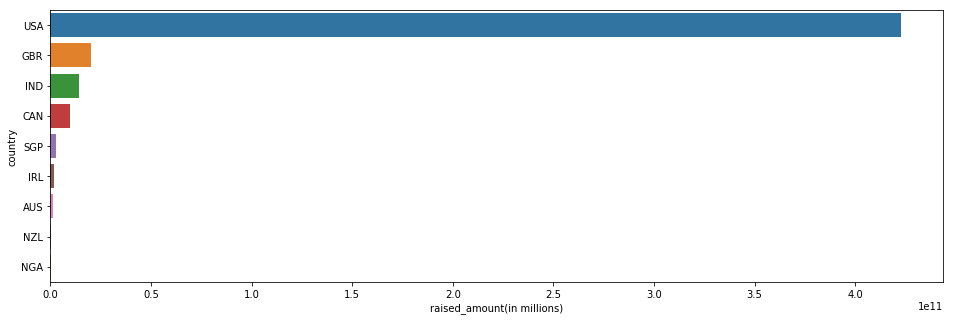

In [56]:
#top9 is the dataframe which is having list of top9 countries having funding type as venture and total raised amount.
plt.figure(figsize=(16,5))
plot2 = sns.barplot(x = top9['raised_amount_usd'], y = top9['country_code'])
plot2.set(xlabel = 'raised_amount(in millions)', ylabel = 'country')
fig2 = plot2.get_figure()
fig2.savefig("plot2.png")

## Question3 : A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

## Answer: Plot3

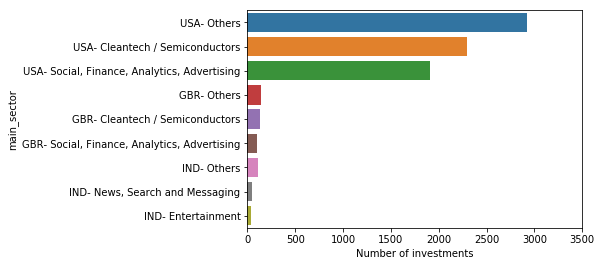

In [57]:
D1_top3 = D1.groupby(['main_sector'])['raised_amount_usd'].aggregate(('sum', 'count')).sort_values(by=['count'], ascending = False).head(3).reset_index()
D2_top3 = D2.groupby(['main_sector'])['raised_amount_usd'].aggregate(('sum', 'count')).sort_values(by=['count'], ascending = False).head(3).reset_index()
D3_top3 = D3.groupby(['main_sector'])['raised_amount_usd'].aggregate(('sum', 'count')).sort_values(by=['count'], ascending = False).head(3).reset_index()
D1_top3['main_sector'] = 'USA- ' + D1_top3.iloc[:,0].map(str)  
D2_top3['main_sector'] = 'GBR- ' + D2_top3.iloc[:,0].map(str)  
D3_top3['main_sector'] = 'IND- ' + D3_top3.iloc[:,0].map(str)
top3 = pd.concat([D1_top3, D2_top3, D3_top3], axis=0)
top3
plot3 = sns.barplot(x = top3['count'], y = top3['main_sector'])
plot3.set_xlim(0, 3500)
plot3.set(xlabel = 'Number of investments')
fig3 = plot3.get_figure()
fig3.savefig("plot3.png")

# End